In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('evaluation_returns.csv')
data.head()

,Zero-Sum DDPG,Standard DDPG
0,-4167.774531,-4349.333390
1,-3066.485171,-3870.319323
2,-3991.504476,-3701.412232
3,-3977.375761,-4443.285373
4,-3562.187102,-2707.455702


/var/folders/cf/x6zpxdwn2dg40q0c0r418f7c0000gp/T/ipykernel_4090/3495699971.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data['Zero-Sum DDPG'], data['Standard DDPG']], labels=['Zero-Sum DDPG', 'Standard DDPG'])


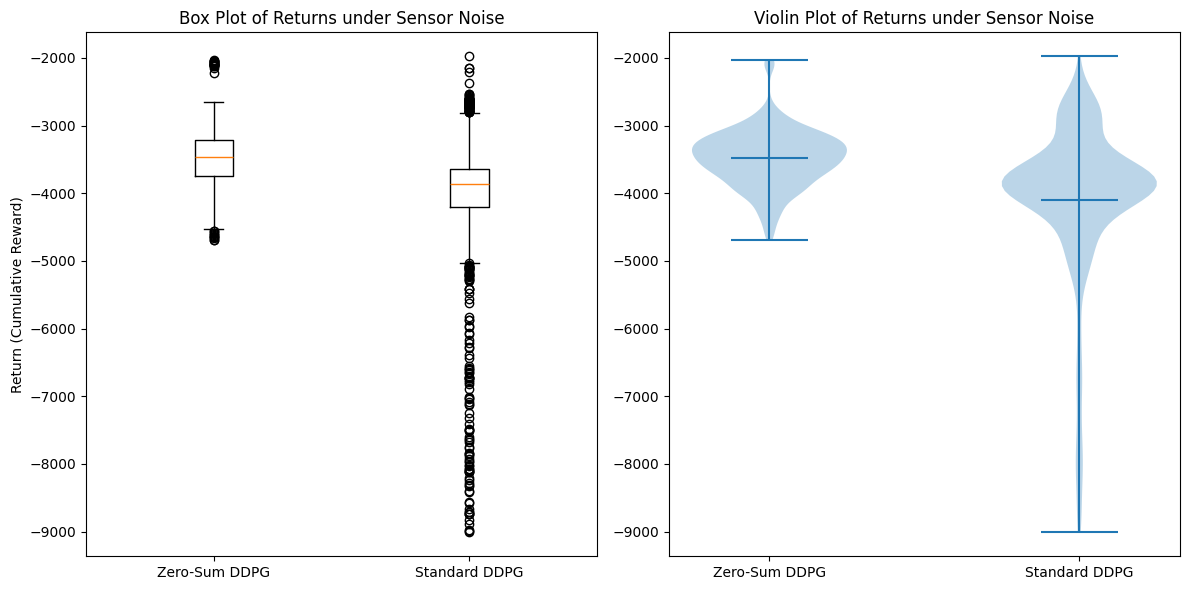

In [3]:
# Create a figure with two subplots side-by-side
plt.figure(figsize=(12, 6))

# Box Plot
plt.subplot(1, 2, 1)
plt.boxplot([data['Zero-Sum DDPG'], data['Standard DDPG']], labels=['Zero-Sum DDPG', 'Standard DDPG'])
plt.title('Box Plot of Returns under Sensor Noise')
plt.ylabel('Return (Cumulative Reward)')

# Violin Plot
plt.subplot(1, 2, 2)
plt.violinplot([data['Zero-Sum DDPG'], data['Standard DDPG']], showmeans=True)
plt.xticks([1, 2], ['Zero-Sum DDPG', 'Standard DDPG'])
plt.title('Violin Plot of Returns under Sensor Noise')

plt.tight_layout()
plt.show()

In [13]:
# Subtract each column's mean and divide by its standard deviation
df_standardized = (data - data.mean()) / data.std()

print(df_standardized.head())


   Zero_Sum_DDPG  Standard_DDPG
0      -1.592553      -0.206450
1       0.977904       0.196618
2      -1.181131       0.338745
3      -1.148154      -0.285506
4      -0.179086       1.175114


/var/folders/cf/x6zpxdwn2dg40q0c0r418f7c0000gp/T/ipykernel_4090/1513778229.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Zero-Sum DDPG', 'Standard DDPG'])


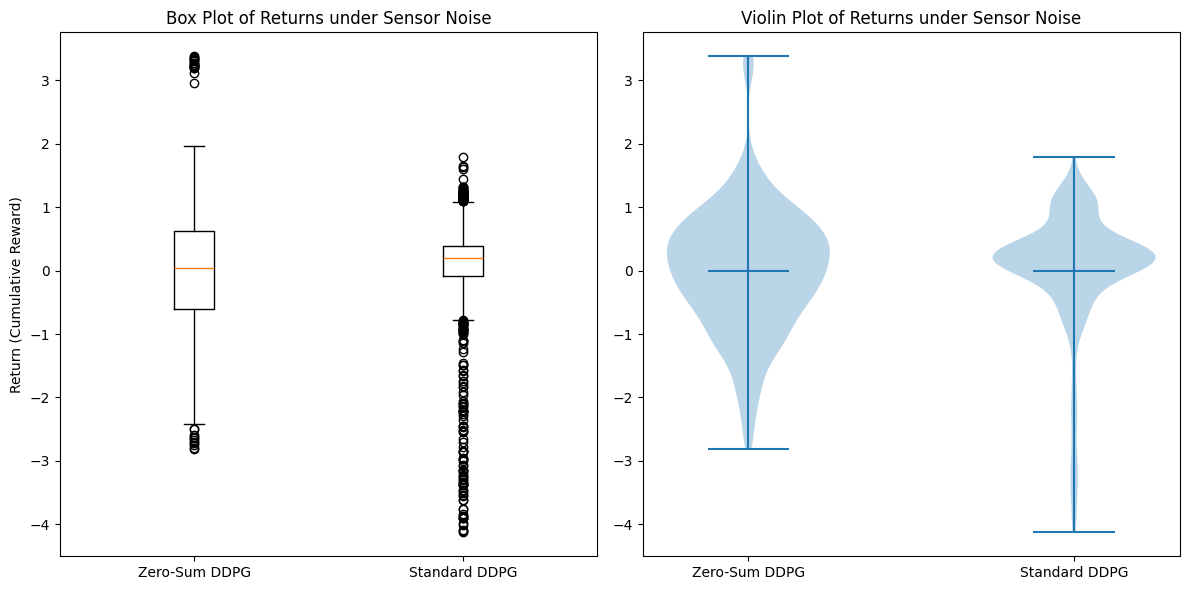

In [14]:
data = df_standardized
# Create a figure with two subplots side-by-side
plt.figure(figsize=(12, 6))

# Box Plot
plt.subplot(1, 2, 1)
plt.boxplot(data, labels=['Zero-Sum DDPG', 'Standard DDPG'])
plt.title('Box Plot of Returns under Sensor Noise')
plt.ylabel('Return (Cumulative Reward)')

# Violin Plot
plt.subplot(1, 2, 2)
plt.violinplot(data, showmeans=True)
plt.xticks([1, 2], ['Zero-Sum DDPG', 'Standard DDPG'])
plt.title('Violin Plot of Returns under Sensor Noise')

plt.tight_layout()
plt.show()

In [17]:
import pandas as pd
import re
from sklearn.preprocessing import MinMaxScaler

# 1) Read the CSV into a DataFrame
df = pd.read_csv("evaluation_returns.csv")
df_100 = df.sample(n=10, random_state=42)
df = df_100

# 2) Clean column names to remove non-alphanumeric chars, replace with underscores
df.columns = [re.sub(r"\W+", "_", col) for col in df.columns]
data = df

# 3) Normalize the data (Min-Max scaling to [0,1])
# Subtract each column's mean and divide by its standard deviation
df_standardized = (data - data.mean()) / data.std()

print(df_standardized.head())

# 4) Write the normalized data to a .dat file, using tabs
df_standardized.to_csv("../../../../../Report/plots/ddpg/violin_plot/initial_condition_shift.dat", sep="\t", index=False)

print("Normalized data written to 'initial_condition_shift.dat' with cleaned headers.")


     Zero_Sum_DDPG  Standard_DDPG
521       0.887893       0.349139
737      -0.013371       0.480285
740       0.043176       0.249590
660      -0.115175       0.367750
411       0.012442       0.206241
Normalized data written to 'initial_condition_shift.dat' with cleaned headers.
